In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import time
import os
import random

from utils import *
from encoder import Encoder
from decoder import DecodeNext, Decoder

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Data & Model Parameters

In [24]:
smiles = list(fetch_smiles_gdb13('./data/gdb13/')[0])
smiles = random.sample(smiles, 50000)

In [25]:
params = make_params(smiles=smiles, GRU_HIDDEN_DIM=256, to_file='gdb13_params.json')
#params = make_params(from_file='gdb13_params.json')

In [26]:
total_n = 50000
train_n = 50000
test_n = total_n - train_n

one_hots = to_one_hot(smiles, params)

train_dataloader = DataLoader(one_hots[:train_n], batch_size=5, shuffle=True)
#test_dataloader = DataLoader(one_hots[train_n:], batch_size=5, shuffle=True)

print(f'total_n = {total_n}')
print(f'train_n = {train_n}')
print(f'test_n = {test_n}')

total_n = 50000
train_n = 50000
test_n = 0


### Model

In [27]:
encoder = Encoder(params)
decoder = Decoder(params)

### Train

In [28]:
LR = 0.0001
EPOCHS = 3

In [11]:
encoder_optimizer = optim.Adam(encoder.parameters(), lr=LR)
decoder_optimizer = optim.Adam(decoder.parameters(), lr=LR)

criterion = nn.CrossEntropyLoss()

losses = []

encoder.train()
decoder.train()

for epoch_n in range(EPOCHS):
    for x in train_dataloader:
        
        # x.shape = (N, L, C)
        
        encoder_optimizer.zero_grad()
        decoder_optimizer.zero_grad()
        
        latents = encoder(x)
        
        y = decoder(latents, target=x)
        
        loss = criterion(y.transpose(1, 2), torch.argmax(x, dim=2))

        losses.append(float(loss))
        
        loss.backward()
        
        encoder_optimizer.step()
        decoder_optimizer.step()
        
torch.save(mo)

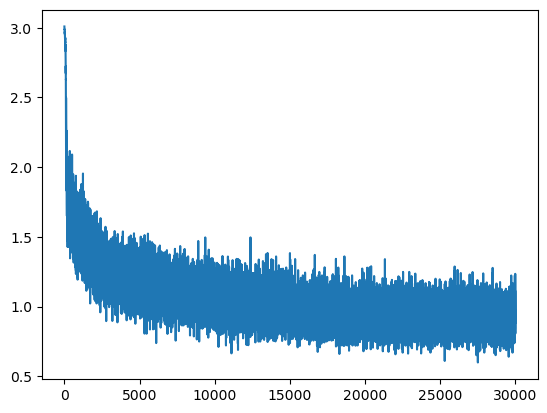

In [12]:
plt.plot(losses)

In [13]:
x = one_hots[0:1]

latent = encoder(x)

y = decoder(latent)

In [14]:
criterion(
    torch.softmax(y, dim=2).transpose(1, 2), 
    torch.argmax(x, dim=2)
)

tensor(2.7316, grad_fn=<NllLoss2DBackward0>)

In [16]:
from_one_hot(x, params)

['C1C2OC3CNC4C2C[NH+]1CC4O3']

In [20]:
torch.softmax(y, dim=2)

tensor([[[1.1965e-01, 4.4017e-02, 4.4017e-02, 4.4017e-02, 4.4017e-02,
          4.4017e-02, 4.4017e-02, 4.4017e-02, 4.4017e-02, 4.4017e-02,
          4.4017e-02, 4.4017e-02, 4.4017e-02, 4.4017e-02, 4.4017e-02,
          4.4017e-02, 4.4017e-02, 4.4017e-02, 4.4017e-02, 4.4017e-02,
          4.4017e-02],
         [3.8687e-04, 3.8687e-04, 3.8687e-04, 3.8687e-04, 3.8687e-04,
          3.8687e-04, 3.8687e-04, 3.8687e-04, 3.8687e-04, 3.8687e-04,
          3.8687e-04, 3.8687e-04, 4.6169e-01, 3.8687e-04, 1.6583e-02,
          5.1476e-01, 3.8687e-04, 3.8687e-04, 3.8687e-04, 3.8687e-04,
          3.8687e-04],
         [1.9538e-11, 1.9538e-11, 1.9538e-11, 1.9538e-11, 1.9538e-11,
          1.0000e+00, 4.0958e-08, 1.9538e-11, 1.9538e-11, 1.9538e-11,
          1.9538e-11, 1.2233e-07, 2.0147e-10, 1.9538e-11, 1.9538e-11,
          1.9538e-11, 1.9538e-11, 1.9538e-11, 1.9538e-11, 1.9538e-11,
          1.9538e-11],
         [1.7230e-08, 1.7230e-08, 1.7230e-08, 1.7230e-08, 1.7230e-08,
          1.7230e-08,